In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sys.path.insert(0,'/Users/crockosi/desiobserver/cmrpythonsrc/donuts/Donut/python/Donut/')

In [3]:
from read_donut_fit import *
from getdonutanadata import *
from lutdonuts import *

PointMesh: Could not load ROOT
donutana: could not import ROOT


In [4]:
stampdir = '/Users/crockosi/desiobserver/stamps'

In [5]:
os.getcwd()

'/Users/crockosi/desi/commish/donuts'

In [6]:
# data from the first part of the CI run, before the corrector move
# cutdonutsum cuts out donutana analysis results for fields that have one or more cameras with < ncut donuts that 
# pass the dontuana qa cuts. It calls getndonutscam (from donutana) which calls (from read_donut_fit.py) 
# ndonutscamera which calls getdonutfitresults to read in the individual donut fits and implement the donutana 
# qa cuts at 660 microns out of focus, w252 donut exposures run through donutana.  
# the <4> means cut out all exposures for which the donutana qa cuts leave 4 or fewer donuts on one or more cameras.
# There are 194 exposures that make that cut.  77 of them are at zenith, above 85 degrees.
# only run rundonutana once
#rundonutana(stampdir,9201,10694,'lut660/')
alldict660 = gathermanydonutsum('postcirun/lut660/')
dict660 = cutdonutsum(alldict660, 4, stampdir)
# applydohexapod also looks up the expected hexapod values from the LUT
applydohexapod(dict660)

Loaded /Users/crockosi/desi/desitrac/HexapodLUT/trunk/TelescopeLUT_20190521.txt


/Users/crockosi/desi/commish/donuts/table.py:277: UserWarning: Warning: converting a masked element to nan.
  if repr(val)=='nan' or math.isnan(val):
/Users/crockosi/desi/commish/donuts/table.py:277: UserWarning: Warning: converting a masked element to nan.
  if repr(val)=='nan' or math.isnan(val):
/Users/crockosi/desi/commish/donuts/table.py:277: UserWarning: Warning: converting a masked element to nan.
  if repr(val)=='nan' or math.isnan(val):
/Users/crockosi/desi/commish/donuts/table.py:277: UserWarning: Warning: converting a masked element to nan.
  if repr(val)=='nan' or math.isnan(val):
/Users/crockosi/desi/commish/donuts/table.py:277: UserWarning: Warning: converting a masked element to nan.
  if repr(val)=='nan' or math.isnan(val):
/Users/crockosi/desi/commish/donuts/table.py:277: UserWarning: Warning: converting a masked element to nan.
  if repr(val)=='nan' or math.isnan(val):
/Users/crockosi/desi/commish/donuts/table.py:277: UserWarning: Warning: converting a masked element 

/Users/crockosi/desi/commish/donuts/table.py:277: UserWarning: Warning: converting a masked element to nan.
  if repr(val)=='nan' or math.isnan(val):
/Users/crockosi/desi/commish/donuts/table.py:277: UserWarning: Warning: converting a masked element to nan.
  if repr(val)=='nan' or math.isnan(val):
/Users/crockosi/desi/commish/donuts/table.py:277: UserWarning: Warning: converting a masked element to nan.
  if repr(val)=='nan' or math.isnan(val):
/Users/crockosi/desi/commish/donuts/table.py:277: UserWarning: Warning: converting a masked element to nan.
  if repr(val)=='nan' or math.isnan(val):
/Users/crockosi/desi/commish/donuts/table.py:277: UserWarning: Warning: converting a masked element to nan.
  if repr(val)=='nan' or math.isnan(val):
/Users/crockosi/desi/commish/donuts/table.py:277: UserWarning: Warning: converting a masked element to nan.
  if repr(val)=='nan' or math.isnan(val):
/Users/crockosi/desi/commish/donuts/table.py:277: UserWarning: Warning: converting a masked element 

In [7]:
ihi660,=np.where(dict660['MOUNTEL']>85.)

In [8]:
len(ihi660)

77

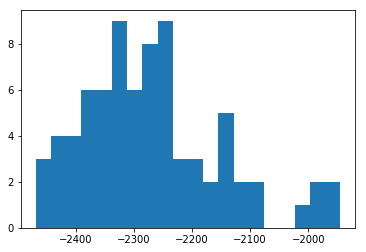

In [9]:
a,b,c=plt.hist(dict660['newx'][ihi660],bins=20)

In [10]:
print(np.mean(dict660['newx'][ihi660]))
print(np.median(dict660['newx'][ihi660]))
print(np.std(dict660['newx'][ihi660]))

-2268.802095974026
-2282.481069
119.49539823872153


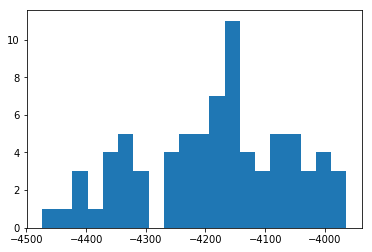

In [11]:
a,b,c=plt.hist(dict660['newy'][ihi660],bins=20)

In [12]:
print(np.mean(dict660['newy'][ihi660]))
print(np.median(dict660['newy'][ihi660]))
print(np.std(dict660['newy'][ihi660]))

-4184.61502648052
-4172.561981
124.33271410121785


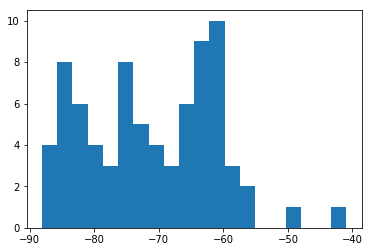

In [13]:
a,b,c=plt.hist(dict660['newxt'][ihi660],bins=20)

In [14]:
print(np.mean(dict660['newyt'][ihi660]))
print(np.median(dict660['newyt'][ihi660]))
print(np.std(dict660['newyt'][ihi660]))

15.362882129870133
14.166688
11.32398016554044


In [15]:
#At zenith, best values:
#newx -2300  (mean is -2269, median is -2282, std 119.5 microns.
#newy -4200 (mean -4184, median -4172, std 124 microns)
#newxt -71 (mean -71.1, median -70.1, std 10.1 arcsec). Three peaks, hysteresis? Problem with sensitivity matrix?
#newyt 15 arcsec (mean 15, median 14, std 11. More outliers than I would like. 
# it would be good to try this with a symmetric version of the new hexapod matrix. 
# could check correlations

In [16]:
# compute deltas: zenithval - best_hexapod_val
# subtract delta from zenith value to get best hexapod position
dx660 = -2300 - dict660['newx']
dy660 = -4200 - dict660['newy']
dxt660 = -71. - dict660['newxt']
dyt660 = 15 - dict660['newyt']
# this dz not correct, see later
dz660 = -8400 - dict660['newz']

In [17]:
# after the corrector move. All of these frames taken nominally 770 um out of focus
#rundonutana(stampdir,16135,16168,'dxdy770/') 
#rundonutana(stampdir,12906,12934,'lut770/')
#rundonutana(stampdir,14012,14058,'lut770/')
#rundonutana(stampdir,14592,14638,'lut770/')
#this should stop at 16219. 16220 and later are at -770 microns out of focus
#rundonutana(stampdir,16187,16226,'lut770/')
alldict770 = gathermanydonutsum('postcirun/lut770/')
dict770 = cutdonutsum(alldict770, 4, stampdir)
applydohexapod(dict770)

Loaded /Users/crockosi/desi/desitrac/HexapodLUT/trunk/TelescopeLUT_20190521.txt


/Users/crockosi/desi/commish/donuts/table.py:277: UserWarning: Warning: converting a masked element to nan.
  if repr(val)=='nan' or math.isnan(val):
/Users/crockosi/desi/commish/donuts/table.py:277: UserWarning: Warning: converting a masked element to nan.
  if repr(val)=='nan' or math.isnan(val):
/Users/crockosi/desi/commish/donuts/table.py:277: UserWarning: Warning: converting a masked element to nan.
  if repr(val)=='nan' or math.isnan(val):
/Users/crockosi/desi/commish/donuts/table.py:277: UserWarning: Warning: converting a masked element to nan.
  if repr(val)=='nan' or math.isnan(val):
/Users/crockosi/desi/commish/donuts/table.py:277: UserWarning: Warning: converting a masked element to nan.
  if repr(val)=='nan' or math.isnan(val):
/Users/crockosi/desi/commish/donuts/table.py:277: UserWarning: Warning: converting a masked element to nan.
  if repr(val)=='nan' or math.isnan(val):
/Users/crockosi/desi/commish/donuts/table.py:277: UserWarning: Warning: converting a masked element 

In [18]:
ihi770,=np.where(dict770['MOUNTEL']>85.)

In [19]:
len(ihi770)

12

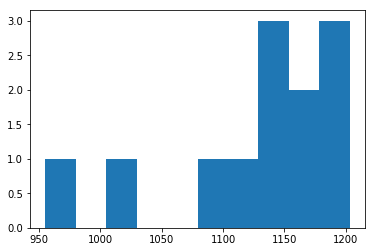

In [20]:
a,b,c=plt.hist(dict770['newx'][ihi770],bins=10)

In [21]:
print(np.mean(dict770['newx'][ihi770]))
print(np.median(dict770['newx'][ihi770]))
print(np.std(dict770['newx'][ihi770]))

1130.16347075
1151.491983
72.07426006699032


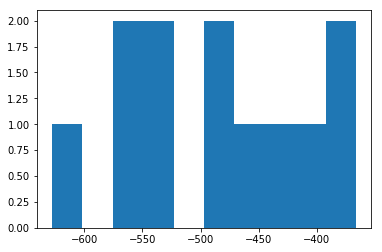

In [22]:
a,b,c=plt.hist(dict770['newy'][ihi770],bins=10)

In [23]:
print(np.mean(dict770['newy'][ihi770]))
print(np.median(dict770['newy'][ihi770]))
print(np.std(dict770['newy'][ihi770]))

-483.9494075
-472.790782
78.02239572887228


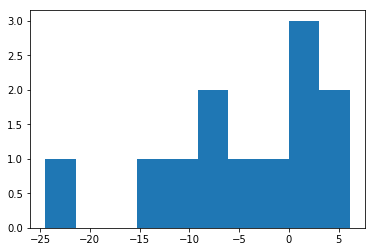

In [25]:
a,b,c=plt.hist(dict770['newxt'][ihi770],bins=10)

In [24]:
print(np.mean(dict770['newxt'][ihi770]))
print(np.median(dict770['newxt'][ihi770]))
print(np.std(dict770['newxt'][ihi770]))

-4.508827166666666
-2.7540885
8.464743649527037


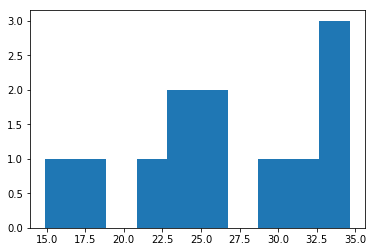

In [26]:
a,b,c=plt.hist(dict770['newyt'][ihi770],bins=10)

In [27]:
print(np.mean(dict770['newyt'][ihi770]))
print(np.median(dict770['newyt'][ihi770]))
print(np.std(dict770['newyt'][ihi770]))

26.223534583333333
25.1500535
6.164638554676348


In [28]:
#newx 1140  (mean 1130, median 1152, std 72, max 1200, min 950,)
#newy -480 (mean -484 median -472 std 78, looks nice)
#newxt -3  (mean -4.5, median -2.6, std 8.6, min -25, max 5)
#newyt 25  (mean 26 median 25 std 6 min 15 max 35)
#that's nice and close to my best zeith values of 1000,-400, 430,0.0,30
# those were used to make the LUT installed 20190521 and was used for the second part of the run.
# so the LUT should have kept the corrector aligned at zenith. 

In [29]:
# compute deltas: zenithval - best_hexapod_val
# subtract delta from zenith value to get best hexapod position
dx770 = 1140 - dict770['newx']
dy770 = -480 - dict770['newy']
dxt770 = -3 - dict770['newxt']
dyt770 =  25 - dict770['newyt']
# this dz not correct, see later
dz770 = 430 - dict770['newz']

In [30]:
# combine deltas to make combined lookup table
deltax = np.concatenate((dx660,dx770),axis=None)
deltay = np.concatenate((dy660,dy770),axis=None)
deltaxt = np.concatenate((dxt660,dxt770),axis=None)
deltayt = np.concatenate((dyt660,dyt770),axis=None)
lutdataaz = np.concatenate((dict660['MOUNTAZ'],dict770['MOUNTAZ']),axis=None)
lutdatael = np.concatenate((dict660['MOUNTEL'],dict770['MOUNTEL']),axis=None)
# these dz aren't correct, see below
deltaz = np.concatenate((dz660,dz770),axis=None)

In [31]:
len(deltax)

278

Text(0.5, 1.05, 'LUT delta x from zenith, microns')

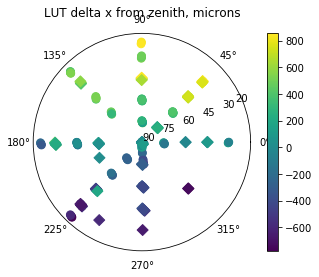

In [32]:
pax = plt.subplot(111,projection='polar')
pax.grid(False)
pcol = pax.scatter(np.pi*dict660['MOUNTAZ']/180.,90-dict660['MOUNTEL'],c=dx660,s=60)
pcol = pax.scatter(np.pi*dict770['MOUNTAZ']/180.,90-dict770['MOUNTEL'],c=dx770,s=60,marker='D')
pax.set_rmax(75)
pax.set_rticks([0,15,30,45,60,70])
pax.set_yticklabels([90,75,60,45,30,20])
plt.colorbar(pcol)
pax.set_title('LUT delta x from zenith, microns')

Text(0.5, 1.05, 'LUT delta y from zenith, microns')

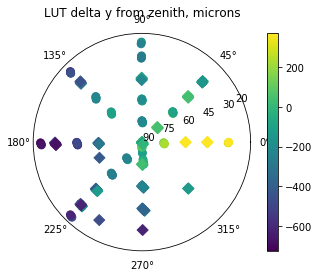

In [33]:
pax = plt.subplot(111,projection='polar')
pax.grid(False)
pcol = pax.scatter(np.pi*dict660['MOUNTAZ']/180.,90-dict660['MOUNTEL'],c=dy660,s=60)
pcol = pax.scatter(np.pi*dict770['MOUNTAZ']/180.,90-dict770['MOUNTEL'],c=dy770,s=60,marker='D')
pax.set_rmax(75)
pax.set_rticks([0,15,30,45,60,70])
pax.set_yticklabels([90,75,60,45,30,20])
plt.colorbar(pcol)
pax.set_title('LUT delta y from zenith, microns')

Text(0.5, 1.05, 'LUT delta x-tilt from zenith, arcsec')

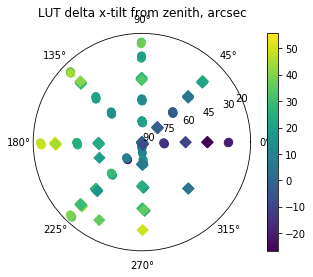

In [34]:
pax = plt.subplot(111,projection='polar')
pax.grid(False)
pcol = pax.scatter(np.pi*dict660['MOUNTAZ']/180.,90-dict660['MOUNTEL'],c=dxt660,s=60)
pcol = pax.scatter(np.pi*dict770['MOUNTAZ']/180.,90-dict770['MOUNTEL'],c=dxt770,s=60,marker='D')
pax.set_rmax(75)
pax.set_rticks([0,15,30,45,60,70])
pax.set_yticklabels([90,75,60,45,30,20])
plt.colorbar(pcol)
pax.set_title('LUT delta x-tilt from zenith, arcsec')

Text(0.5, 1.05, 'LUT delta y-tilt from zenith, arcsec')

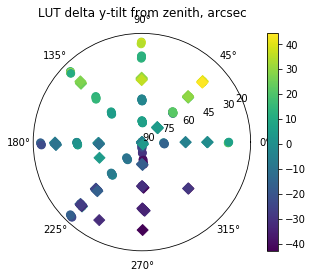

In [35]:
pax = plt.subplot(111,projection='polar')
pax.grid(False)
pcol = pax.scatter(np.pi*dict660['MOUNTAZ']/180.,90-dict660['MOUNTEL'],c=dyt660,s=60)
pcol = pax.scatter(np.pi*dict770['MOUNTAZ']/180.,90-dict770['MOUNTEL'],c=dyt770,s=60,marker='D')
pax.set_rmax(75)
pax.set_rticks([0,15,30,45,60,70])
pax.set_yticklabels([90,75,60,45,30,20])
plt.colorbar(pcol)
pax.set_title('LUT delta y-tilt from zenith, arcsec')

In [36]:
# slices in elevation
i20,=np.where(lutdatael < 25)
i30,=np.where((lutdatael > 25) & (lutdatael < 35))
i45,=np.where((lutdatael > 40) & (lutdatael < 50))
i60,=np.where((lutdatael > 55) & (lutdatael < 65))
i75,=np.where((lutdatael > 70) & (lutdatael < 80))

In [37]:
# second arg is vec of LUT values at zenith, to subtract so the output of this function is the deltas
laserlut = readlut('/Users/crockosi/desi/desitrac/HexapodLUT/trunk/TelescopeLUT_20190521.txt',[1100.,-400.,430.,0.0,30.])

In [38]:
laseraz = laserlut['az']
laserel = laserlut['el']
ill20,=np.where(laserel < 25)
ill30,=np.where((laserel > 25) & (laserel < 35))
ill45,=np.where((laserel > 40) & (laserel < 50))
ill60,=np.where((laserel > 55) & (laserel < 65))
ill75,=np.where((laserel > 70) & (laserel < 80))

Now work on the focus term in the LUT

In [39]:
# Compute expected best focus value based on temp-focus relation
# isbefore is flag to get correct zero point for before or after corrector move
def gettempcorrfocus(donutdict,isbefore=True):

    tempvec = donutdict['TRUSTEMP']
    if isbefore is True:
        ztvec = -8350+110.*(7.-tempvec)
    else:
        ztvec = 580.+110.*(7.-tempvec)
    return ztvec

zt660 is the true focus for each frame, accouting for temperature but not flexure 

In [40]:
zt660 = gettempcorrfocus(dict660)

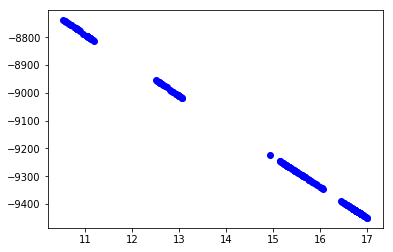

In [41]:
plt.plot(dict660['TRUSTEMP'],zt660,'bo')

Plot best focus value from donutana vs. expected best focus from temp-focus relation

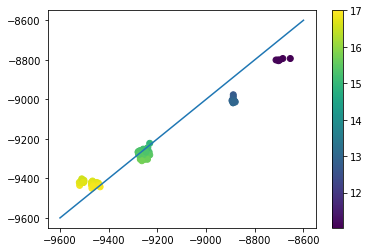

In [42]:
plt.scatter(dict660['newz'][ihi660],zt660[ihi660],c=dict660['TRUSTEMP'][ihi660])
plt.plot(np.asarray([-9600,-8600]),np.asarray([-9600,-8600]))
plt.colorbar()

In [43]:
zt770 = gettempcorrfocus(dict770,isbefore=False)

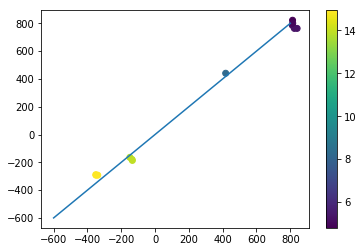

In [44]:
plt.scatter(dict770['newz'][ihi770],zt770[ihi770],c=dict770['TRUSTEMP'][ihi770])
plt.plot(np.asarray([-600,800]),np.asarray([-600,800]))
plt.colorbar()

8930 = 580 - -8350, which is the difference between the two focus offsets

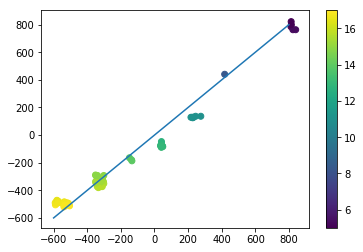

In [45]:
plt.scatter(dict660['newz'][ihi660]+8930,zt660[ihi660]+8930,c=dict660['TRUSTEMP'][ihi660],vmin=5,vmax=17)
plt.scatter(dict770['newz'][ihi770],zt770[ihi770],c=dict770['TRUSTEMP'][ihi770],vmin=5,vmax=17)
plt.plot(np.asarray([-600,800]),np.asarray([-600,800]))
plt.colorbar()

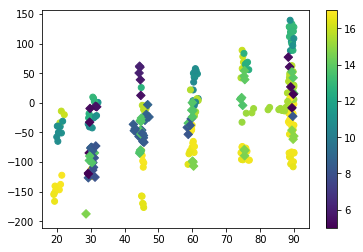

In [53]:
plt.scatter(dict660['MOUNTEL'],dict660['newz']-zt660,c=dict660['TRUSTEMP'],vmin=5,vmax=17)
plt.scatter(dict770['MOUNTEL'],dict770['newz']-zt770,c=dict770['TRUSTEMP'],vmin=5,vmax=17,marker='D')
plt.colorbar()

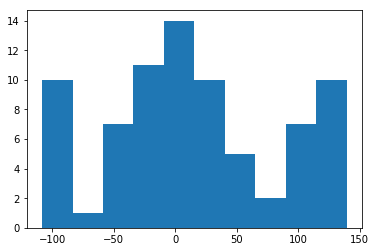

In [60]:
a,b,c = plt.hist(dict660['newz'][ihi660]-zt660[ihi660],bins=10)

In [47]:
np.mean(dict660['newz'][ihi660]-zt660[ihi660])

14.995744441558516

In [48]:
np.median(dict660['newz'][ihi660]-zt660[ihi660])

5.383325999999215

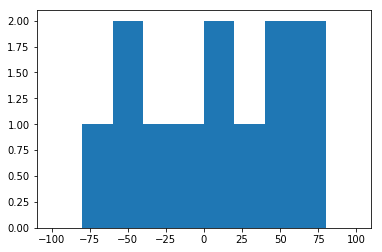

In [61]:
a,b,c = plt.hist(dict770['newz'][ihi770]-zt770[ihi770],bins=10,range=[-100,100])

In [49]:
np.mean(dict770['newz'][ihi770]-zt770[ihi770])

7.79858908333333

In [50]:
i660el20,=np.where(dict660['MOUNTEL'] < 25)

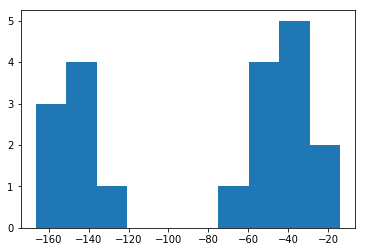

In [59]:
a,b,c = plt.hist(dict660['newz'][i660el20]-zt660[i660el20],bins=10)

In [51]:
np.median(dict660['newz'][i660el20]-zt660[i660el20])

-54.38778000000002

In [52]:
np.mean(dict660['newz'][i660el20]-zt660[i660el20])

-83.21367874999996

In [54]:
i770el30,=np.where(dict770['MOUNTEL'] < 35)

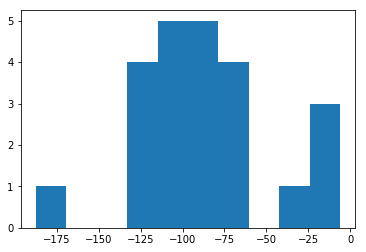

In [58]:
a,b,c = plt.hist(dict770['newz'][i770el30]-zt770[i770el30],bins=10)

In [55]:
np.mean(dict770['newz'][i770el30]-zt770[i770el30])

-86.58519308695654

In [56]:
np.median(dict770['newz'][i770el30]-zt770[i770el30])

-90.05694099999994

In [62]:
slope660 = -(-83.2-15)/70.

In [63]:
slope660

1.4028571428571428

In [57]:
slope770 = -(-86.5-7.8)/60.

In [64]:
slope770

1.5716666666666665

Use slope 1.5

In [65]:
1.5*90.- 1.5*20

105.0

105 microns passes the eyeball test, it looks like focus at 20 deg elevation is about 100 microns less (more negative) than focus at zenith. 
Lessee, I expect the truss to pull the hexapod farther away from the primary at lower elevation, which is in the +z direction in CS6. So to compensate the hexapod needs to move toward -z at lower elevation. 
The zt calculation is correct, it is most negative when the truss temp is warmest and at its maximum thermal expansion so we have to move the hexapod most negative (back toward the primary) to compensate.
I am computing the difference zfoc - zt, so a positive difference means zfoc is larger, more positive. I am getting that zfoc is more negative at lower elevations, as expected. Good.

Note that for the LUT I need to compute deltas as: zenithval - best_hexapod_val 
So I subtract delta from zenith value to get best hexapod position. 
That is zt660-dict[660][newz]

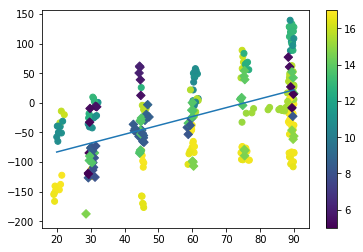

In [67]:
plt.scatter(dict660['MOUNTEL'],dict660['newz']-zt660,c=dict660['TRUSTEMP'],vmin=5,vmax=17)
plt.scatter(dict770['MOUNTEL'],dict770['newz']-zt770,c=dict770['TRUSTEMP'],vmin=5,vmax=17,marker='D')
plt.colorbar()
plt.plot(np.asarray([20,90]),np.asarray([-83.2,(-83.2+105)]))

Make LUT

In [68]:
lutaz,lutel = makespheregrid()

Need error estimates, use measurement scatter

In [70]:
dxerr = np.ones(len(deltax))*150
dyerr = np.ones(len(deltax))*150
dxtilterr = np.ones(len(deltax))*10.
dytilterr = np.ones(len(deltax))*10.


In [71]:
dxlut = fitlutdelta(lutdataaz,lutdatael,deltax,dxerr,lutaz,lutel)

In [72]:
ilut20 = np.where(lutel < 22.)
ilut30 = np.where((lutel > 25) & (lutel < 35))
ilut45 = np.where((lutel > 40) & (lutel < 50))
ilut60 = np.where((lutel > 55) & (lutel < 65))
ilut75 = np.where((lutel > 70) & (lutel < 80))

Text(0, 0.5, 'microns')

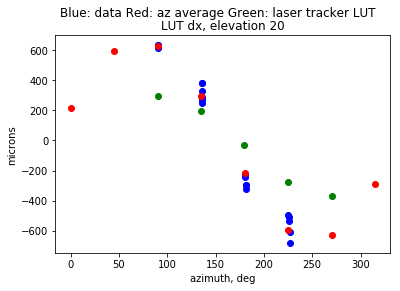

In [73]:
plt.plot(lutdataaz[i20],deltax[i20],'bo')
plt.plot(lutaz[ilut20],dxlut[ilut20],'ro')
plt.plot(laseraz[ill20],laserlut['hexdx'][ill20],'go')
plt.suptitle('Blue: data Red: az average Green: laser tracker LUT')
plt.title('LUT dx, elevation 20')
plt.xlabel('azimuth, deg')
plt.ylabel('microns')

OK, looks fine. Let's do the rest.

In [75]:
newlut = fitlut(lutdataaz, lutdatael, deltax, deltay, deltaxt, deltayt, dxerr, dyerr, dxtilterr, dytilterr)

In [76]:
lutaz = newlut['lutaz']
lutel = newlut['lutel']

In [77]:
makedzlut(1.5,newlut)

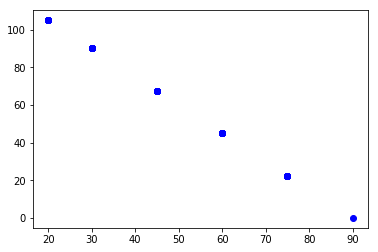

In [78]:
plt.plot(newlut['lutel'],newlut['lutdz'],'bo')

Text(0, 0.5, 'microns')

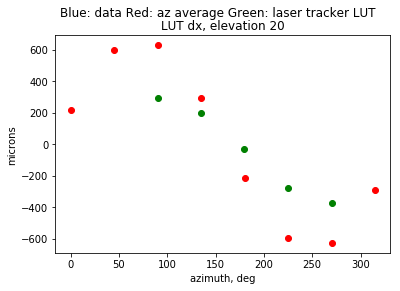

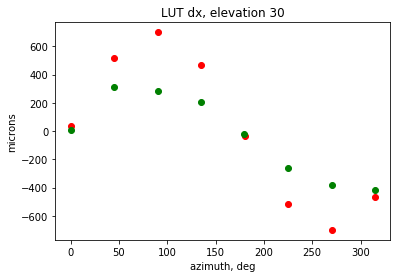

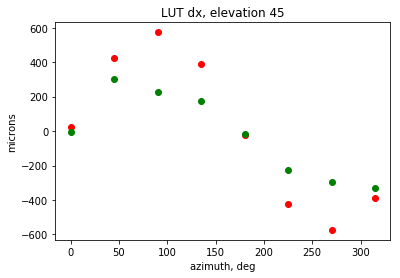

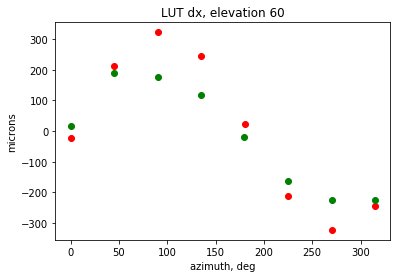

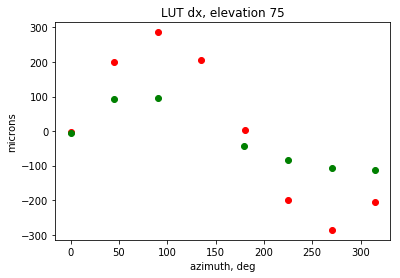

In [79]:
#plt.plot(lutdataaz[i20],deltax[i20],'bo')
plt.plot(lutaz[ilut20],newlut['lutdx'][ilut20],'ro')
plt.plot(laseraz[ill20],laserlut['hexdx'][ill20],'go')
plt.suptitle('Blue: data Red: az average Green: laser tracker LUT')
plt.title('LUT dx, elevation 20')
plt.xlabel('azimuth, deg')
plt.ylabel('microns')
plt.figure()
#plt.plot(lutdataaz[i30],deltax[i30],'bo')
plt.plot(lutaz[ilut30],newlut['lutdx'][ilut30],'ro')
plt.plot(laseraz[ill30],laserlut['hexdx'][ill30],'go')
plt.title('LUT dx, elevation 30')
plt.xlabel('azimuth, deg')
plt.ylabel('microns')
plt.figure()
#plt.plot(lutdataaz[i45],deltax[i45],'bo')
plt.plot(lutaz[ilut45],newlut['lutdx'][ilut45],'ro')
plt.plot(laseraz[ill45],laserlut['hexdx'][ill45],'go')
plt.title('LUT dx, elevation 45')
plt.xlabel('azimuth, deg')
plt.ylabel('microns')
plt.figure()
#plt.plot(lutdataaz[i60],deltax[i60],'bo')
plt.plot(lutaz[ilut60],newlut['lutdx'][ilut60],'ro')
plt.plot(laseraz[ill60],laserlut['hexdx'][ill60],'go')
plt.title('LUT dx, elevation 60')
plt.xlabel('azimuth, deg')
plt.ylabel('microns')
plt.figure()
#plt.plot(lutdataaz[i75],deltax[i75],'bo')
plt.plot(lutaz[ilut75],newlut['lutdx'][ilut75],'ro')
plt.plot(laseraz[ill75],laserlut['hexdx'][ill75],'go')
plt.title('LUT dx, elevation 75')
plt.xlabel('azimuth, deg')
plt.ylabel('microns')

Text(0, 0.5, 'microns')

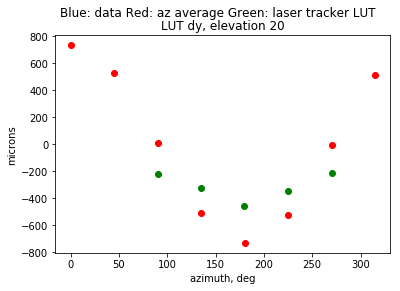

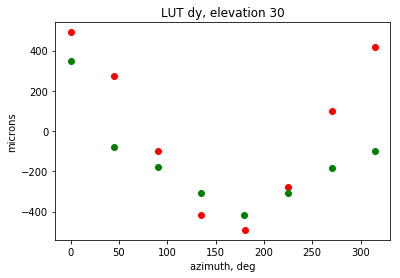

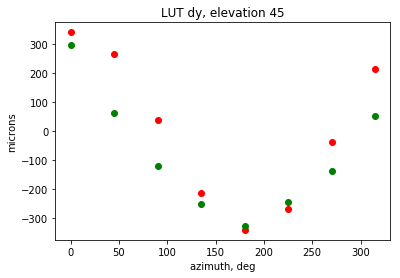

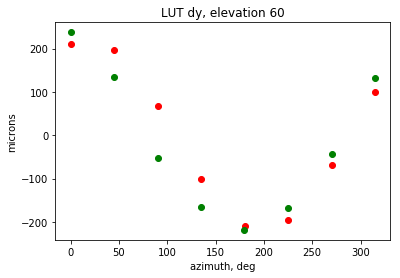

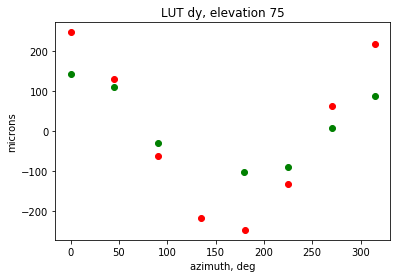

In [80]:
#plt.plot(lutdataaz[i20],deltay[i20],'bo')
plt.plot(lutaz[ilut20],newlut['lutdy'][ilut20],'ro')
plt.plot(laseraz[ill20],laserlut['hexdy'][ill20],'go')
plt.suptitle('Blue: data Red: az average Green: laser tracker LUT')
plt.title('LUT dy, elevation 20')
plt.xlabel('azimuth, deg')
plt.ylabel('microns')
plt.figure()
#plt.plot(lutdataaz[i30],deltay[i30],'bo')
plt.plot(lutaz[ilut30],newlut['lutdy'][ilut30],'ro')
plt.plot(laseraz[ill30],laserlut['hexdy'][ill30],'go')
plt.title('LUT dy, elevation 30')
plt.xlabel('azimuth, deg')
plt.ylabel('microns')
plt.figure()
#plt.plot(lutdataaz[i45],deltay[i45],'bo')
plt.plot(lutaz[ilut45],newlut['lutdy'][ilut45],'ro')
plt.plot(laseraz[ill45],laserlut['hexdy'][ill45],'go')
plt.title('LUT dy, elevation 45')
plt.xlabel('azimuth, deg')
plt.ylabel('microns')
plt.figure()
#plt.plot(lutdataaz[i60],deltay[i60],'bo')
plt.plot(lutaz[ilut60],newlut['lutdy'][ilut60],'ro')
plt.plot(laseraz[ill60],laserlut['hexdy'][ill60],'go')
plt.title('LUT dy, elevation 60')
plt.xlabel('azimuth, deg')
plt.ylabel('microns')
plt.figure()
#plt.plot(lutdataaz[i75],deltay[i75],'bo')
plt.plot(lutaz[ilut75],newlut['lutdy'][ilut75],'ro')
plt.plot(laseraz[ill75],laserlut['hexdy'][ill75],'go')
plt.title('LUT dy, elevation 75')
plt.xlabel('azimuth, deg')
plt.ylabel('microns')

Text(0, 0.5, 'arcsec')

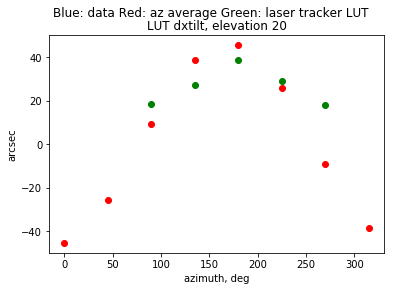

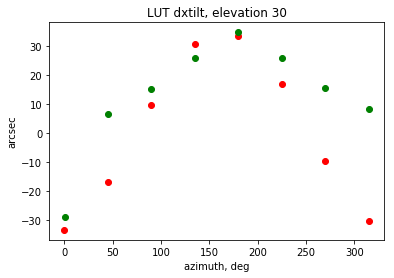

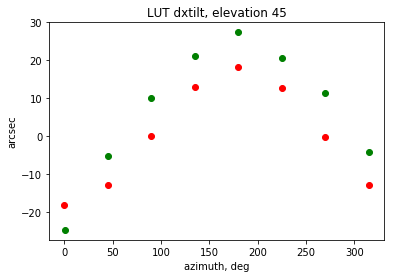

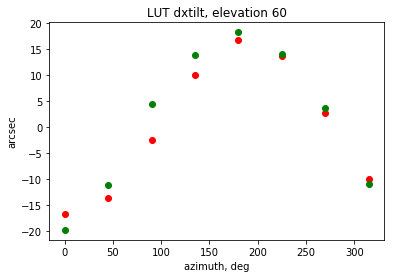

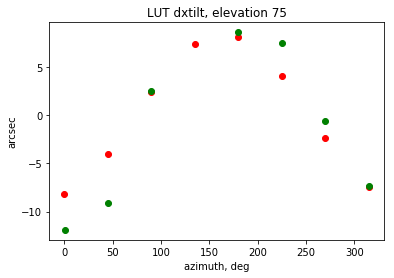

In [81]:
#plt.plot(lutdataaz[i20],deltaxt[i20],'bo')
plt.plot(lutaz[ilut20],newlut['lutdxtilt'][ilut20],'ro')
plt.plot(laseraz[ill20],laserlut['hexdxt'][ill20],'go')
plt.suptitle('Blue: data Red: az average Green: laser tracker LUT')
plt.title('LUT dxtilt, elevation 20')
plt.xlabel('azimuth, deg')
plt.ylabel('arcsec')
plt.figure()
#plt.plot(lutdataaz[i30],deltaxt[i30],'bo')
plt.plot(lutaz[ilut30],newlut['lutdxtilt'][ilut30],'ro')
plt.plot(laseraz[ill30],laserlut['hexdxt'][ill30],'go')
plt.title('LUT dxtilt, elevation 30')
plt.xlabel('azimuth, deg')
plt.ylabel('arcsec')
plt.figure()
#plt.plot(lutdataaz[i45],deltaxt[i45],'bo')
plt.plot(lutaz[ilut45],newlut['lutdxtilt'][ilut45],'ro')
plt.plot(laseraz[ill45],laserlut['hexdxt'][ill45],'go')
plt.title('LUT dxtilt, elevation 45')
plt.xlabel('azimuth, deg')
plt.ylabel('arcsec')
plt.figure()
#plt.plot(lutdataaz[i60],deltaxt[i60],'bo')
plt.plot(lutaz[ilut60],newlut['lutdxtilt'][ilut60],'ro')
plt.plot(laseraz[ill60],laserlut['hexdxt'][ill60],'go')
plt.title('LUT dxtilt, elevation 60')
plt.xlabel('azimuth, deg')
plt.ylabel('arcsec')
plt.figure()
#plt.plot(lutdataaz[i75],deltaxt[i75],'bo')
plt.plot(lutaz[ilut75],newlut['lutdxtilt'][ilut75],'ro')
plt.plot(laseraz[ill75],laserlut['hexdxt'][ill75],'go')
plt.title('LUT dxtilt, elevation 75')
plt.xlabel('azimuth, deg')
plt.ylabel('arcsec')

Text(0, 0.5, 'arcsec')

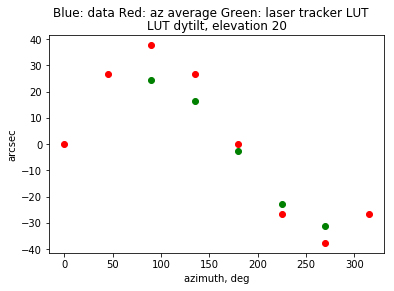

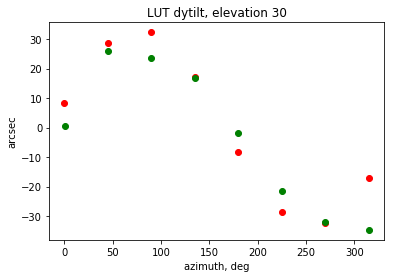

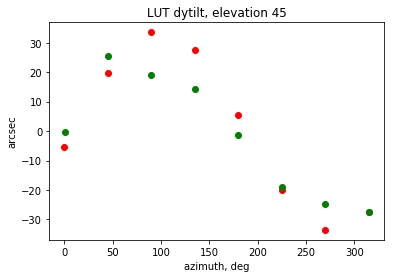

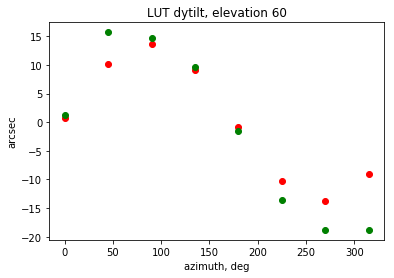

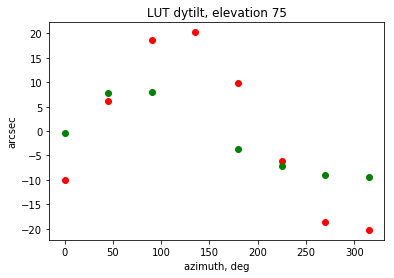

In [82]:
#plt.plot(lutdataaz[i20],deltayt[i20],'bo')
plt.plot(lutaz[ilut20],newlut['lutdytilt'][ilut20],'ro')
plt.plot(laseraz[ill20],laserlut['hexdyt'][ill20],'go')
plt.suptitle('Blue: data Red: az average Green: laser tracker LUT')
plt.title('LUT dytilt, elevation 20')
plt.xlabel('azimuth, deg')
plt.ylabel('arcsec')
plt.figure()
#plt.plot(lutdataaz[i30],deltayt[i30],'bo')
plt.plot(lutaz[ilut30],newlut['lutdytilt'][ilut30],'ro')
plt.plot(laseraz[ill30],laserlut['hexdyt'][ill30],'go')
plt.title('LUT dytilt, elevation 30')
plt.xlabel('azimuth, deg')
plt.ylabel('arcsec')
plt.figure()
#plt.plot(lutdataaz[i45],deltayt[i45],'bo')
plt.plot(lutaz[ilut45],newlut['lutdytilt'][ilut45],'ro')
plt.plot(laseraz[ill45],laserlut['hexdyt'][ill45],'go')
plt.title('LUT dytilt, elevation 45')
plt.xlabel('azimuth, deg')
plt.ylabel('arcsec')
plt.figure()
#plt.plot(lutdataaz[i60],deltayt[i60],'bo')
plt.plot(lutaz[ilut60],newlut['lutdytilt'][ilut60],'ro')
plt.plot(laseraz[ill60],laserlut['hexdyt'][ill60],'go')
plt.title('LUT dytilt, elevation 60')
plt.xlabel('azimuth, deg')
plt.ylabel('arcsec')
plt.figure()
#plt.plot(lutdataaz[i75],deltayt[i75],'bo')
plt.plot(lutaz[ilut75],newlut['lutdytilt'][ilut75],'ro')
plt.plot(laseraz[ill75],laserlut['hexdyt'][ill75],'go')
plt.title('LUT dytilt, elevation 75')
plt.xlabel('azimuth, deg')
plt.ylabel('arcsec')

Text(0, 0.5, 'microns')

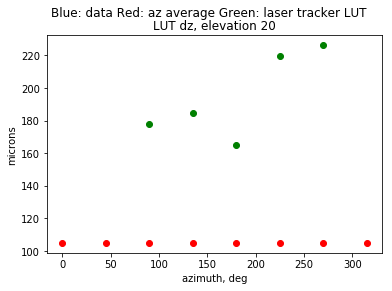

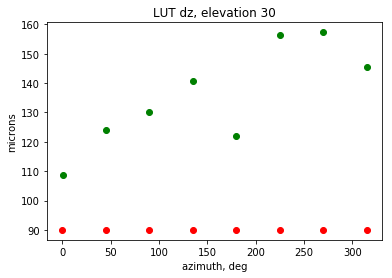

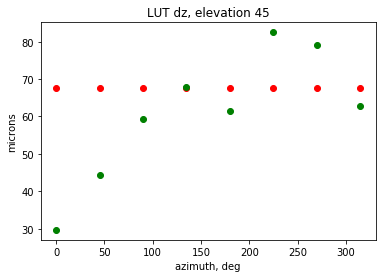

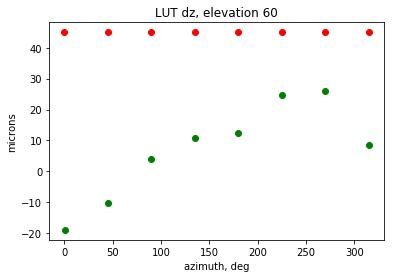

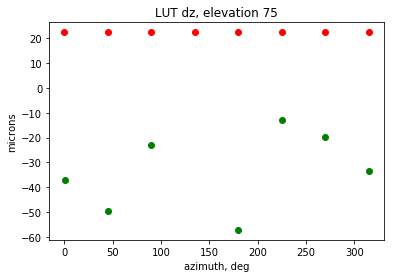

In [84]:
#plt.plot(lutdataaz[i20],deltaz[i20],'bo')
plt.plot(lutaz[ilut20],newlut['lutdz'][ilut20],'ro')
plt.plot(laseraz[ill20],laserlut['hexdz'][ill20],'go')
plt.suptitle('Blue: data Red: az average Green: laser tracker LUT')
plt.title('LUT dz, elevation 20')
plt.xlabel('azimuth, deg')
plt.ylabel('microns')
plt.figure()
#plt.plot(lutdataaz[i30],deltaz[i30],'bo')
plt.plot(lutaz[ilut30],newlut['lutdz'][ilut30],'ro')
plt.plot(laseraz[ill30],laserlut['hexdz'][ill30],'go')
plt.title('LUT dz, elevation 30')
plt.xlabel('azimuth, deg')
plt.ylabel('microns')
plt.figure()
#plt.plot(lutdataaz[i45],deltaz[i45],'bo')
plt.plot(lutaz[ilut45],newlut['lutdz'][ilut45],'ro')
plt.plot(laseraz[ill45],laserlut['hexdz'][ill45],'go')
plt.title('LUT dz, elevation 45')
plt.xlabel('azimuth, deg')
plt.ylabel('microns')
plt.figure()
#plt.plot(lutdataaz[i60],deltaz[i60],'bo')
plt.plot(lutaz[ilut60],newlut['lutdz'][ilut60],'ro')
plt.plot(laseraz[ill60],laserlut['hexdz'][ill60],'go')
plt.title('LUT dz, elevation 60')
plt.xlabel('azimuth, deg')
plt.ylabel('microns')
plt.figure()
#plt.plot(lutdataaz[i75],deltaz[i75],'bo')
plt.plot(lutaz[ilut75],newlut['lutdz'][ilut75],'ro')
plt.plot(laseraz[ill75],laserlut['hexdz'][ill75],'go')
plt.title('LUT dz, elevation 75')
plt.xlabel('azimuth, deg')
plt.ylabel('microns')

In [85]:
# don't overwrite unless you mean it..
#writelut(newlut,'../hexapod/donutlutdeltas_20190812.txt')

Only remaining thing to do is write a function that will take as input the zenith values and output the LUT with absolute values, zenith-deltas